<style>
/* Set font size for headers */
h1, h2, h3, h4, h5, h6 {
    font-size: 32px; /* Adjust as needed */
}

/* Set font size for paragraphs */
p, li, ul {
    font-size: 24px; /* Adjust as needed */
}
</style>


Introduction to the Julia programming language

![](images/julia-logo.svg)

## 12 Broadcasting and dot Syntax

## Broadcasting (1)

Like _NumPy_ for Python, **Julia** supports "broadcasting" over array types - that is, performing an operation on the *elements* of an array, rather than on the array itself as a whole object.

Almost all Julia operations support being used in "broadcasting" mode - including function calls! In all cases, you just need to prepend the operation with a ".\" (a period / full stop) to use this functionality.

For example, given a simple array:

In [ ]:
myarray = [1,2,3,4,5]
2 .+ myarray

## Broadcasting (2)

When you perform an operation involving arrays with different shapes, Julia automatically "broadcasts" the arrays to have compatible shapes before applying the operation. It essentially extends the smaller array to match the size of the larger one by duplicating elements along dimensions where the sizes differ.

In [ ]:
A = [1 2 3; 4 5 6]        # 2x3 matrix
B = transpose([1, 2, 3])  # 1x3 matrix  

# Using broadcasting to add arrays A and B element-wise
A .+ B 

## Another broadcasting example

In [ ]:
A = [1 2 3]
A' .+ A

$$(1, 2, 3) + \begin{pmatrix} 1 \\ 2 \\ 3 \end{pmatrix} \stackrel{\text{broadcasting}}{=} 
\begin{pmatrix}
1 & 2 & 3 \\
1 & 2 & 3 \\
1 & 2 & 3 
\end{pmatrix}
+
\begin{pmatrix}
1 & 1 & 1 \\
2 & 2 & 2 \\
3 & 3 & 3 
\end{pmatrix}
$$ 

For every binary operator like `^`, there is a corresponding dot operator `.^` that is automatically defined to perform `^` element-by-element on arrays. For example, `[1, 2, 3] ^ 3` is not defined, but `[1, 2, 3] .^ 3` is defined as computing the elementwise result `[1^3, 2^3, 3^3]`:

In [ ]:
[1, 2, 3] .^ 3

In [15]:
x = [1, 2, 3]
sin.(x)

3-element Vector{Float64}:
 0.8414709848078965
 0.9092974268256817
 0.1411200080598672

In [16]:
uppercase.(["abc", "def", "ghi"])

3-element Vector{String}:
 "ABC"
 "DEF"
 "GHI"

 In Julia, vectorized functions are not required for performance, and indeed it is often beneficial to write your own loops.

This kind of "implicit iteration" is very powerful, and can be used to very concisely represent a number of transformations.
For example, making use of the Julia "ImageShow" package family to naturally display a 2d matrix as an image...

In [12]:
function mk(c)
  i = 0; z = 0
  while i < 255 && abs(z) < 2.0
    z = z^2 + c
    i += 1
  end
  i
end

mk (generic function with 1 method)

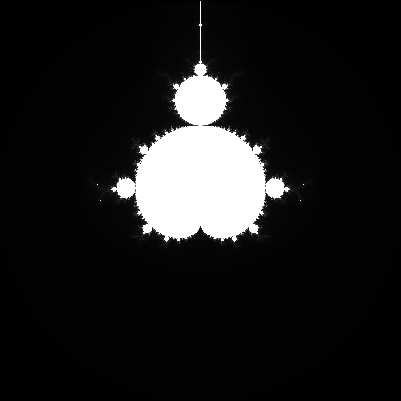

In [14]:
using ImageCore, ImageInTerminal, ImageShow

# a matrix representing a subset of the complex plane:
argand = [ (i+j*1im) / 100 for i in -200:200, j in -200:200 ]

Gray.(mk.(argand) / 255) # same as @. Gray(mk(argand) / 255)